In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import h5py
import pyvisa
import time
from scipy.signal import savgol_filter
import scipy.signal as signal
from scipy import interpolate
from scipy.signal import windows
from matplotlib.ticker import MaxNLocator
from scipy.optimize import least_squares

In [2]:
factor = 2
SMALL_SIZE = factor*8
MEDIUM_SIZE = factor*10
BIGGER_SIZE = factor*12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Plotting/data functions

In [3]:
def choose_time_unit(t):
    if t > 24*3600:
        return "days", 24*3600
    elif t > 3600:
        return "h", 3600
    elif t > 60:
        return "min", 60
    else:
        return "s", 1

In [4]:
def list_dsets(fname="test.hdf"):
    with h5py.File(fname, 'r') as f:
        return list(f.keys())

In [5]:
def plot(run_name, fname="test.hdf", i_arr=[0,-1]):
    # get data from file
    with h5py.File(fname, 'r') as f:
        dset = f[run_name+"/particulates_monitoring/SPS30"][i_arr[0]:i_arr[1]]

        # plot PM2.5 over time
        dset["time"] -= dset["time"][-1]
        t_unit, div = choose_time_unit(-dset["time"][0])
        fig, ax = plt.subplots()
        ax.plot(dset["time"]/div, dset["PM2.5"])
        
        # display average PM2.5
        avg_PM = np.mean(dset["PM2.5"])
        ax.set_title(f"$\langle\mathrm{{PM2.5}}\\rangle={avg_PM:.2f}\;\mu$g/m$^3$")
        
    ax.set_xlabel(f"time [{t_unit}]")
    ax.set_ylabel("PM2.5 [$\mu$g/m$^3$]")
    ax.grid()

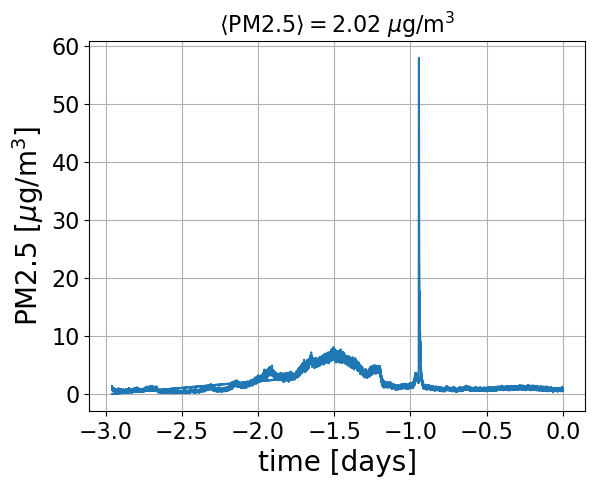

In [12]:
plot(list_dsets()[-1], i_arr=[0,-1])